In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import os

2024-09-22 12:25:34.718649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-22 12:25:34.733095: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-22 12:25:34.737258: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-22 12:25:34.752507: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-22 12:25:38.730494: W tensorflow/compiler/tf2

In [6]:
# GPU 설정: 6번과 7번 GPU만 사용
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # 첫 번째 GPU만 사용하도록 제한
        tf.config.experimental.set_visible_devices(gpus[6], 'GPU')
        tf.config.experimental.set_visible_devices(gpus[7], 'GPU')
        # 메모리 할당 방식 조정 (옵션)
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)


8 Physical GPUs, 1 Logical GPUs


2024-09-22 12:30:34.439743: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46679 MB memory:  -> device: 7, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:e1:00.0, compute capability: 8.9


In [7]:
# 이미지 데이터 경로 설정
lettuce_dir = '/mnt/aix7206/data/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터/상추'
mugwort_dir = '/mnt/aix7206/data/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터/근대'

In [8]:
# 하이퍼파라미터 설정
IMG_HEIGHT, IMG_WIDTH = 150, 150
BATCH_SIZE = 32
EPOCHS = 10

In [9]:
# ImageDataGenerator를 사용한 데이터 로드 및 증강
datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# 학습용 데이터셋 생성
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    directory=os.path.dirname(lettuce_dir),  # 부모 디렉토리
    classes=['상추', '근대'],  # 분류할 클래스 이름
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

Found 1559 images belonging to 2 classes.


In [12]:
# CNN 모델 설계
model = models.Sequential([
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # 입력 레이어 추가
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

Epoch 1/10


/mnt/aix7206/anaconda3/envs/hyeenv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727008968.219311 1904605 service.cc:146] XLA service 0x7fbd20007430 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727008968.219359 1904605 service.cc:154]   StreamExecutor device (0): NVIDIA RTX 6000 Ada Generation, Compute Capability 8.9
2024-09-22 12:42:48.256745: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-22 12:42:48.434168: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8

 1/48 ━━━━━━━━━━━━━━━━━━━━ 6:45 9s/step - accuracy: 0.4062 - loss: 0.6960

I0000 00:00:1727008970.080803 1904605 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


48/48 ━━━━━━━━━━━━━━━━━━━━ 37s 613ms/step - accuracy: 0.7137 - loss: 0.8919
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.9688 - loss: 0.0397
Epoch 3/10


2024-09-22 12:43:18.923507: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-22 12:43:18.923577: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/mnt/aix7206/anaconda3/envs/hyeenv/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


48/48 ━━━━━━━━━━━━━━━━━━━━ 26s 469ms/step - accuracy: 0.9945 - loss: 0.0144
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 1.0000 - loss: 0.0070
Epoch 5/10


2024-09-22 12:43:45.114450: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-09-22 12:43:45.114521: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15724788806385923059
2024-09-22 12:43:45.114552: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17761369744273703468


48/48 ━━━━━━━━━━━━━━━━━━━━ 29s 524ms/step - accuracy: 0.9980 - loss: 0.0062
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 1.0000 - loss: 0.0011
Epoch 7/10


2024-09-22 12:44:14.608813: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15724788806385923059
2024-09-22 12:44:14.608881: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17761369744273703468


48/48 ━━━━━━━━━━━━━━━━━━━━ 29s 517ms/step - accuracy: 0.9960 - loss: 0.0078
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 90us/step - accuracy: 1.0000 - loss: 7.0298e-05
Epoch 9/10


2024-09-22 12:44:43.485822: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-09-22 12:44:43.485878: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15724788806385923059
2024-09-22 12:44:43.485903: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17761369744273703468


48/48 ━━━━━━━━━━━━━━━━━━━━ 28s 502ms/step - accuracy: 1.0000 - loss: 8.2504e-04
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 116us/step - accuracy: 1.0000 - loss: 2.8543e-05


2024-09-22 12:45:11.673956: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15724788806385923059
2024-09-22 12:45:11.674009: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17761369744273703468


수정1

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# 하이퍼파라미터 설정
image_height, image_width = 150, 150  # 이미지 크기
BATCH_SIZE = 32  # 배치 크기
EPOCHS = 10  # 에폭 수

In [17]:
# 이미지 데이터 생성기 초기화
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20%를 검증 데이터로 사용


In [18]:
# 훈련 데이터 생성기 설정
train_generator = train_datagen.flow_from_directory(
    directory='/mnt/aix7206/data/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터/',
    target_size=(image_height, image_width),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # 다중 클래스 분류
    classes=['상추', '근대', '겨자채', '케일'],  # 클래스 이름
    subset='training'  # 훈련 데이터로 설정
)

# 검증 데이터 생성기 설정
validation_generator = train_datagen.flow_from_directory(
    directory='/mnt/aix7206/data/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터/',
    target_size=(image_height, image_width),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # 다중 클래스 분류
    classes=['상추', '근대', '겨자채', '케일'],  # 클래스 이름
    subset='validation'  # 검증 데이터로 설정
)

Found 2503 images belonging to 4 classes.
Found 623 images belonging to 4 classes.


In [19]:
# CNN 모델 구축
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4개의 클래스
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/mnt/aix7206/anaconda3/envs/hyeenv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/mnt/aix7206/anaconda3/envs/hyeenv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 69s 794ms/step - accuracy: 0.4976 - loss: 1.2915 - val_accuracy: 0.8347 - val_loss: 0.4941
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 52s 611ms/step - accuracy: 0.9789 - loss: 0.0799 - val_accuracy: 0.7576 - val_loss: 0.8200
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 53s 626ms/step - accuracy: 0.9925 - loss: 0.0290 - val_accuracy: 0.7287 - val_loss: 0.7784
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 54s 622ms/step - accuracy: 0.9992 - loss: 0.0046 - val_accuracy: 0.8604 - val_loss: 0.3599
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 51s 603ms/step - accuracy: 0.9992 - loss: 0.0019 - val_accuracy: 0.8122 - val_loss: 0.8759
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 52s 602ms/step - accuracy: 1.0000 - loss: 2.1548e-04 - val_accuracy: 0.8074 - val_loss: 0.6026
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 51s 597ms/step - accuracy: 0.9848 - loss: 0.0695 - val_accuracy: 0.8925 - val_loss: 0.3619
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 53s 621ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0

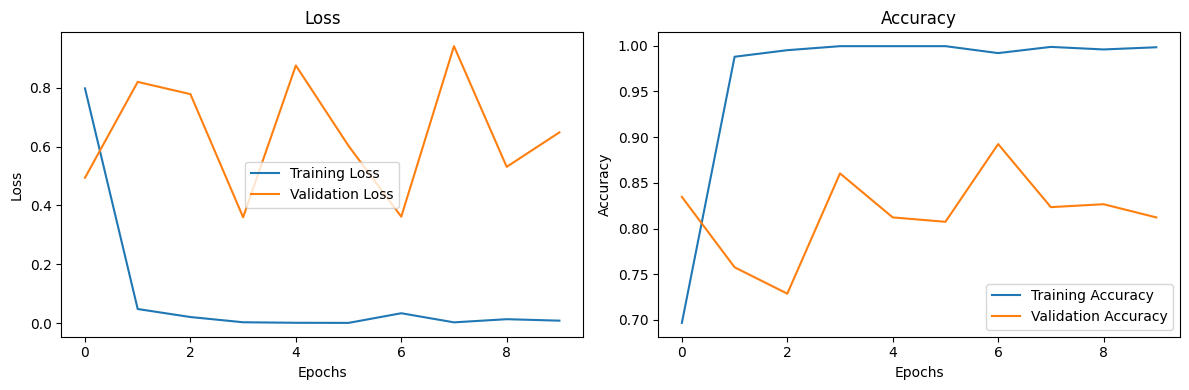

In [20]:
# 모델 학습
history = model.fit(train_generator, 
                    validation_data=validation_generator,
                    epochs=EPOCHS)

# 학습 결과 시각화
def plot_training_history(history):
    # 손실 그래프
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 정확도 그래프
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 시각화 함수 호출
plot_training_history(history)